# **Step 1: Data Cleaning and Preprocessing**

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'telecom_churn.csv'
df = pd.read_csv(file_path)

print(df.head())

print(df.isnull().sum())

df.dropna(inplace=True)

label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

scaler = StandardScaler()
numerical_features = ['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print(df.describe())


   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1  
Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls          

# **Step 2: Exploratory Data Analysis (EDA)**

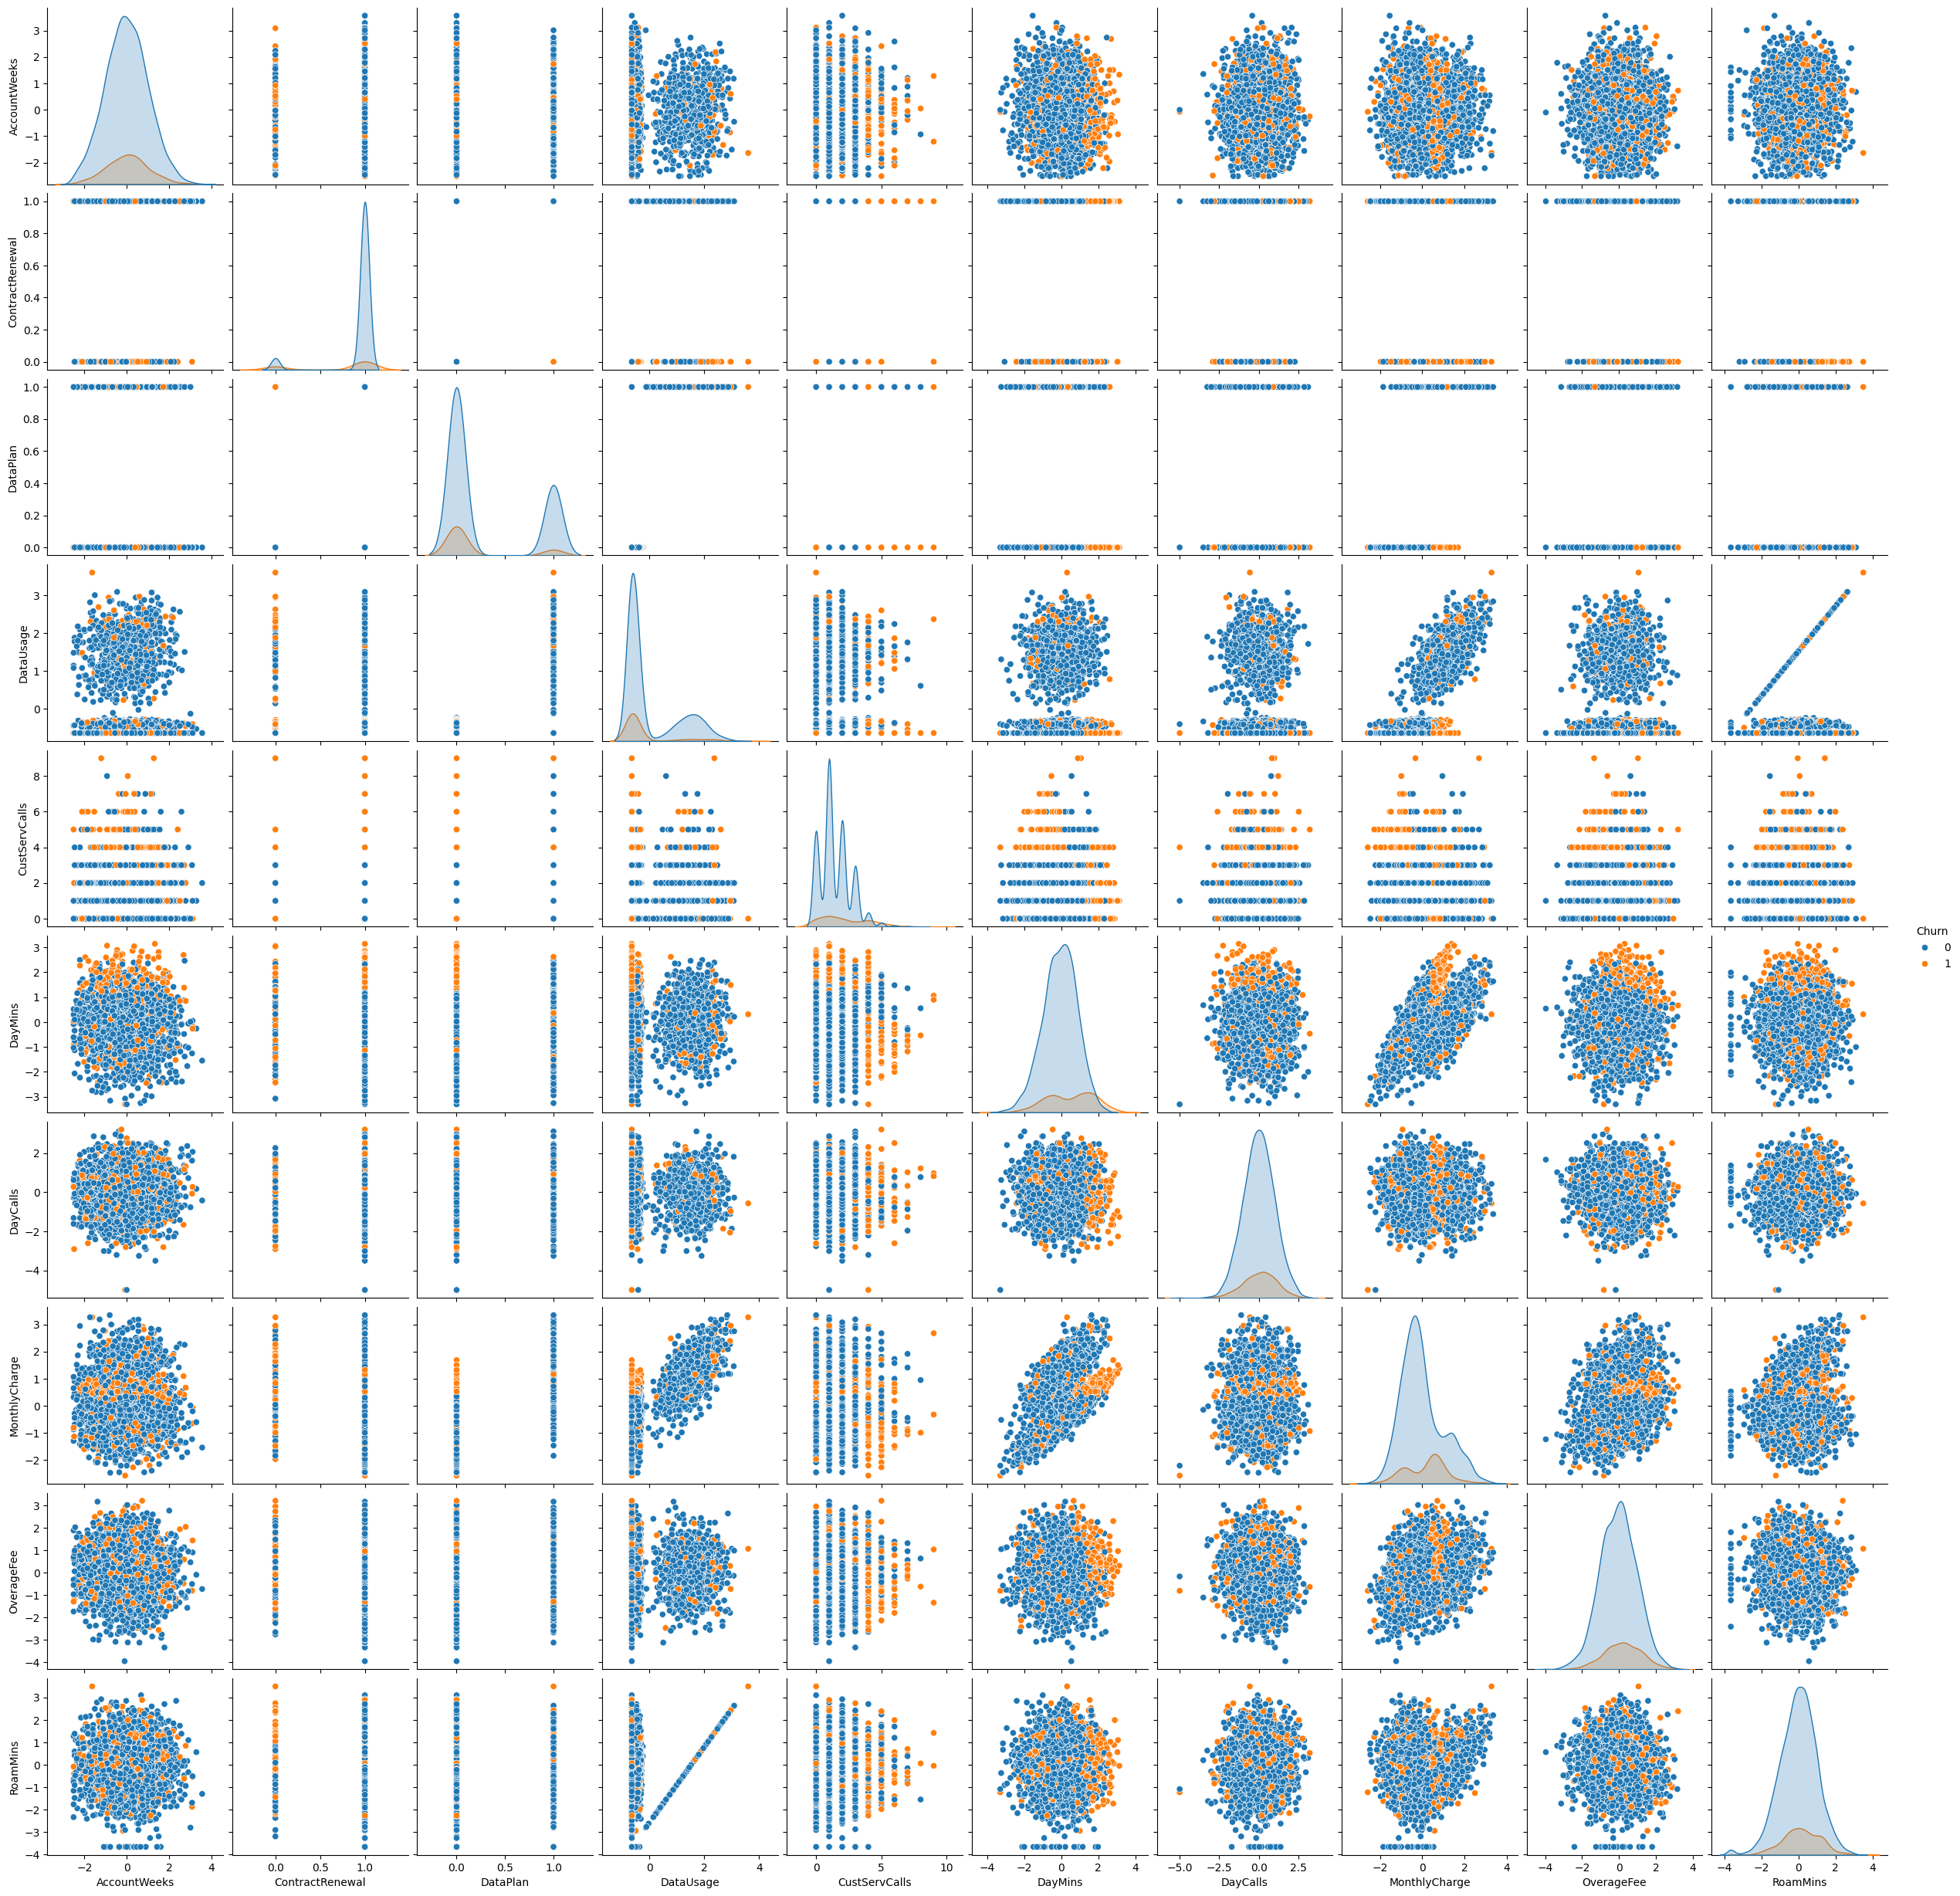

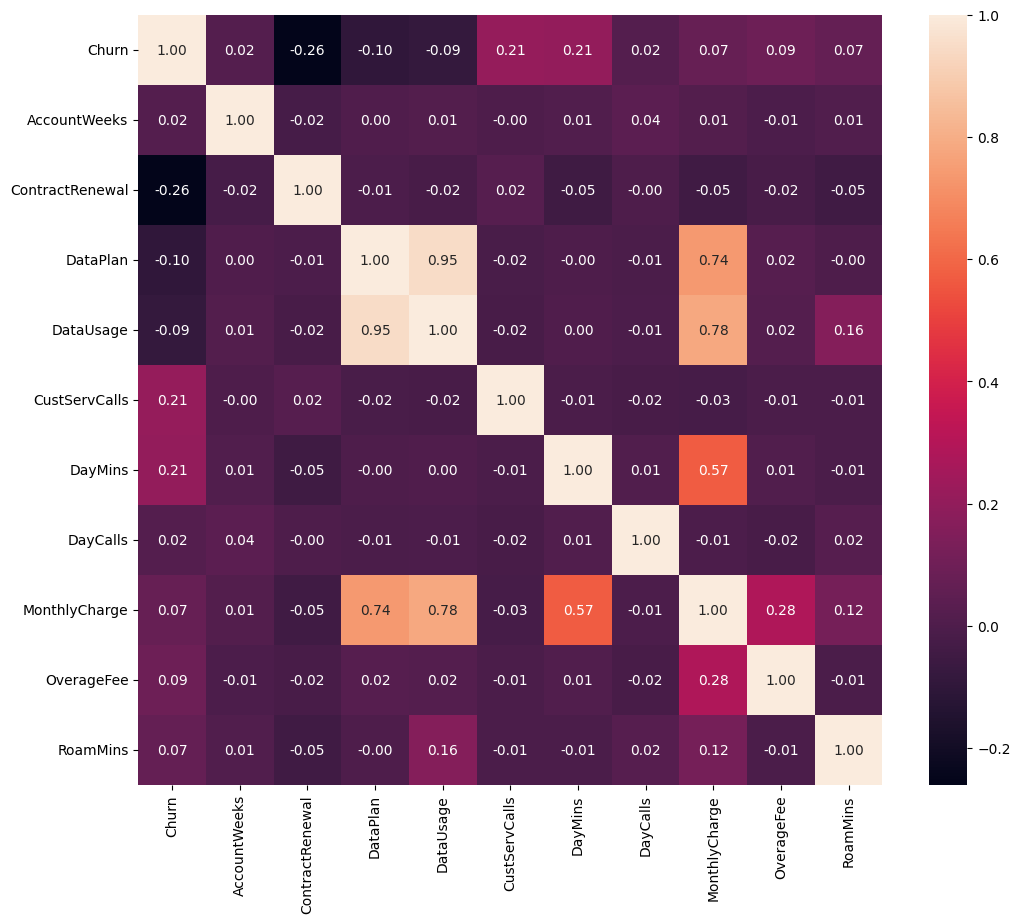

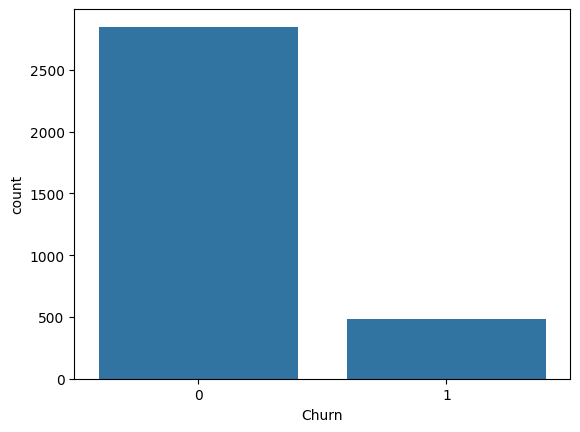

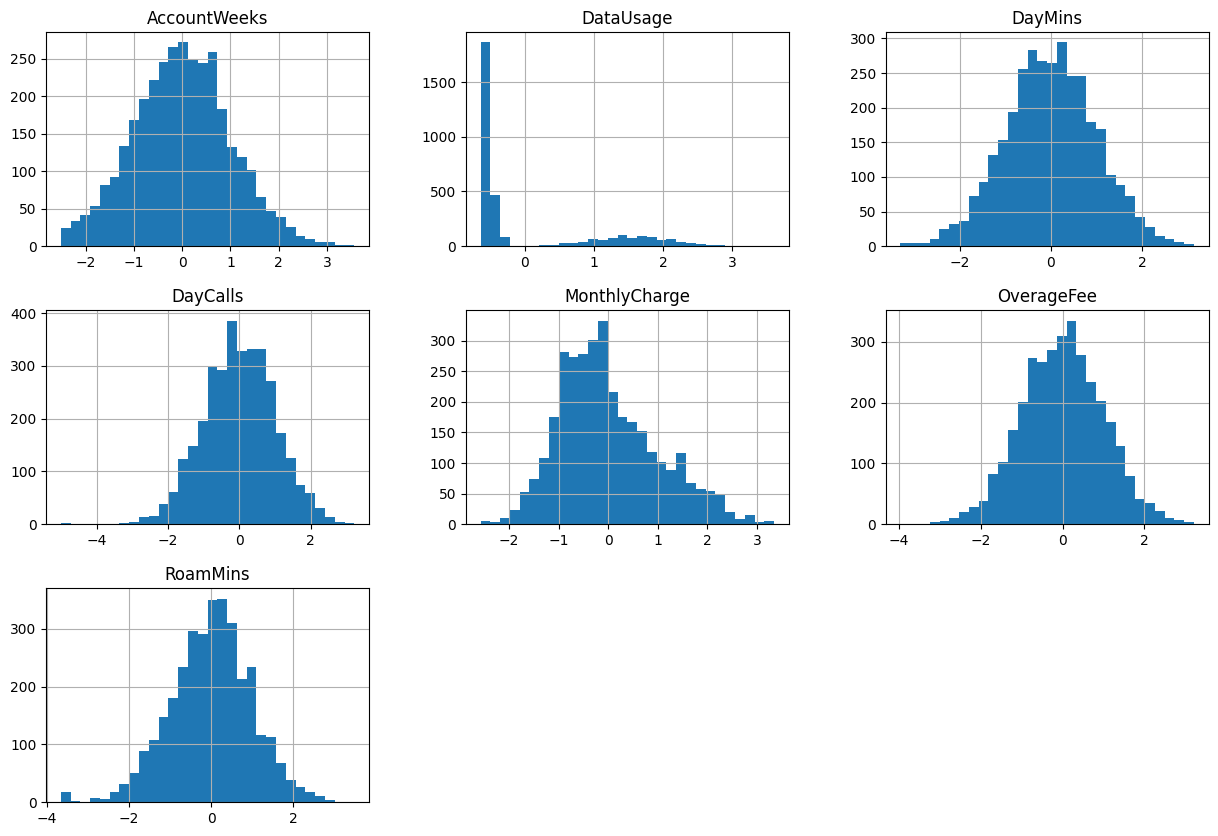

In [8]:
sns.pairplot(df, hue='Churn')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

sns.countplot(x='Churn', data=df)
plt.show()

df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.show()


# **Step 3: Feature Engineering**

In [9]:
df['DayMinsPerCall'] = df['DayMins'] / (df['DayCalls'] + 1)

df['DayMinsPerCall'] = scaler.fit_transform(df[['DayMinsPerCall']])


# **Step 4: Model Selection and Training**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# **Step 5: Model Evaluation and Fine-tuning**

In [11]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Logistic Regression Accuracy: 0.8605697151424287
Confusion Matrix:
 [[556  10]
 [ 83  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.76      0.58      0.60       667
weighted avg       0.84      0.86      0.83       667

Random Forest Accuracy: 0.9340329835082459
Confusion Matrix:
 [[559   7]
 [ 37  64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       566
           1       0.90      0.63      0.74       101

    accuracy                           0.93       667
   macro avg       0.92      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
Best Random Forest Accuracy: 0.9280359820089955
Confusion Matrix:
 [[559   7]
 [ 41  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       566
           1       0.90      0.59      0.71       101

    accuracy                           0.93       667
   macro avg       0.91      0.79      0.84       667
weighted avg       0.93      0.93      0.92       667

